<a href="https://colab.research.google.com/github/S-HILPA-S/CASE-STUDIES/blob/main/HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# loading the dataset

house_price = pd.read_csv("/content/House_Pricing.csv")
house_price.head()


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [28]:
# understanding  the data
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [29]:
house_price.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [30]:
# duplicates row checking and removal

house_price.duplicated().sum()

np.int64(0)

there is no duplicates rows hence no need of removal

In [31]:
# duplicate column checking and removal

house_price.T.duplicated().sum()

np.int64(0)

there is no duplicates column hence no need of removal

In [32]:
# handling missing values

# checking for null values

house_price.isnull().mean()*100

,0
ID,0.000000
Date House was Sold,0.000000
Sale Price,0.018507
No of Bedrooms,0.000000
No of Bathrooms,0.018507
Flat Area (in Sqft),0.041642
Lot Area (in Sqft),0.041642
No of Floors,0.000000
Waterfront View,0.000000
No of Times Visited,90.172581


Droping columns that are irrelevant like the column "No of Times Visited" which has 90% missing values.Also the columns like "ID","Date House was Sold","Renovated Year","lot area" which are not useful for the data is removed.Also since latitude,longitude and zip code,all provide same data ,deleting one from is also done.




In [33]:
house_price =house_price.drop(columns=["No of Times Visited","Lot Area (in Sqft)","ID","Date House was Sold","Renovated Year","Zipcode"])

In [34]:
# REPLACING NULL VALUES IN OTHER COLUMNS
house_price=house_price.dropna(subset=["Sale Price"])

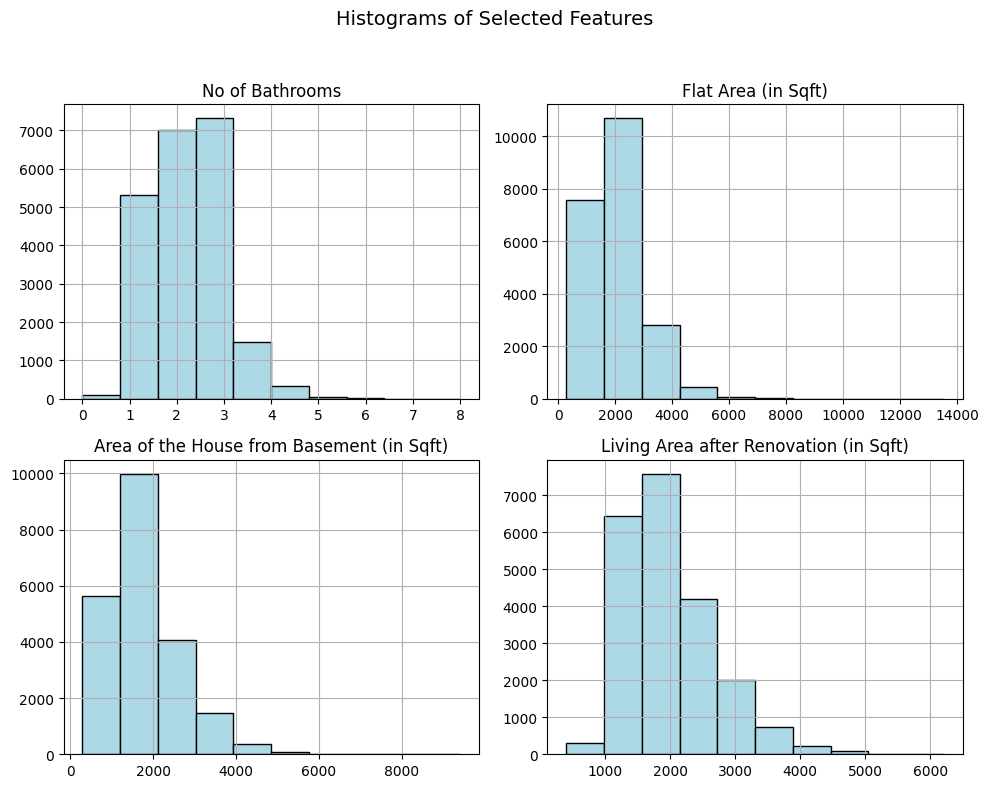

In [35]:
selected_cols = ["No of Bathrooms","Flat Area (in Sqft)","Area of the House from Basement (in Sqft)","Living Area after Renovation (in Sqft)"]  # change as needed

# Plot histograms only for selected columns
house_price[selected_cols].hist(
    figsize=(10, 8),
    bins=10,
    color='lightblue',
    edgecolor='black'
    )
plt.suptitle("Histograms of Selected Features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

since the distribution is skewed for all data columns , replacing with median

In [36]:
# replacing with median

selected_cols = ["No of Bathrooms","Flat Area (in Sqft)","Area of the House from Basement (in Sqft)","Living Area after Renovation (in Sqft)"]
house_price[selected_cols]=house_price[selected_cols].fillna(house_price[selected_cols].median())
house_price = house_price.dropna(subset=["Latitude","Longitude"])

In [37]:
house_price.isnull().sum()

,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0
Overall Grade,0
Area of the House from Basement (in Sqft),0
Basement Area (in Sqft),0


This shows that all null values are removed.

In [38]:
# HANDLING OUTLIERS

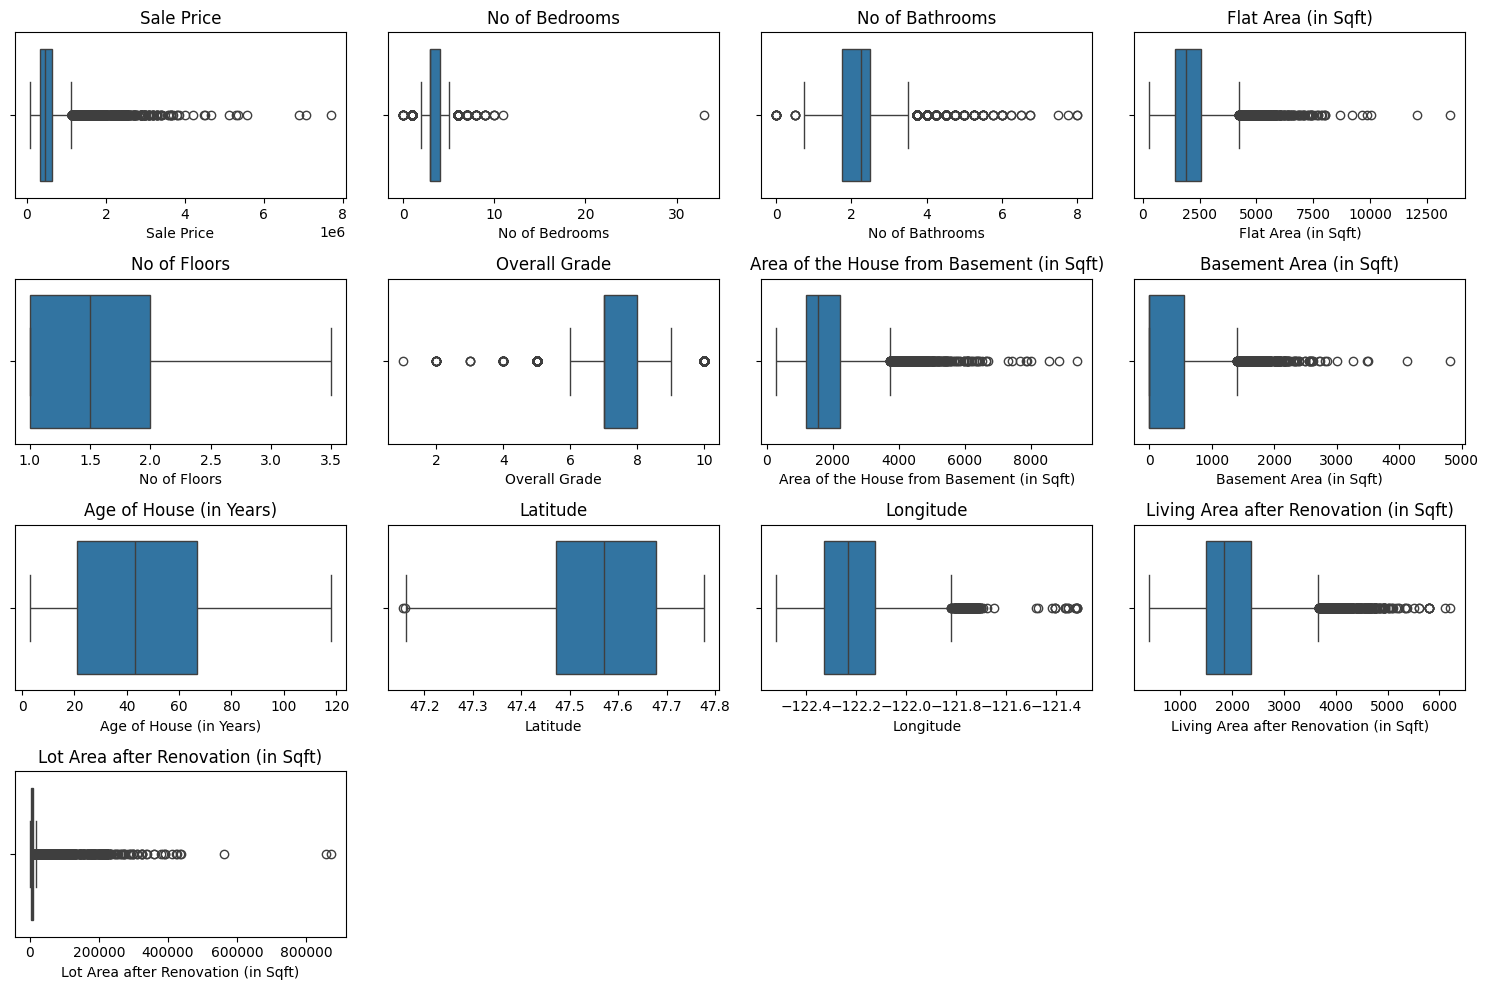

In [39]:
# Plot boxplots for all numerical columns to visualize outliers
numerical_cols = house_price.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=house_price[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [40]:
# Select numerical columns
numerical_cols = house_price.select_dtypes(include=np.number).columns.tolist()

# Optionally, exclude 'Latitude', 'Longitude' if needed
exclude_cols = ['Latitude', 'Longitude']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Apply IQR-based clipping to all numerical columns
for col in numerical_cols:
    Q1 = house_price[col].quantile(0.25)
    Q3 = house_price[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values instead of removing rows
    house_price[col] = house_price[col].clip(lower=lower_bound, upper=upper_bound)

# Clip 'Sale Price' using 1st and 99th percentile (Winsorization)
house_price['Sale Price'] = house_price['Sale Price'].clip(
    lower=house_price['Sale Price'].quantile(0.01),
    upper=house_price['Sale Price'].quantile(0.99)
)

# Final shape remains unchanged
print(f"Shape after clipping (no rows removed): {house_price.shape}")


Shape after clipping (no rows removed): (21607, 15)


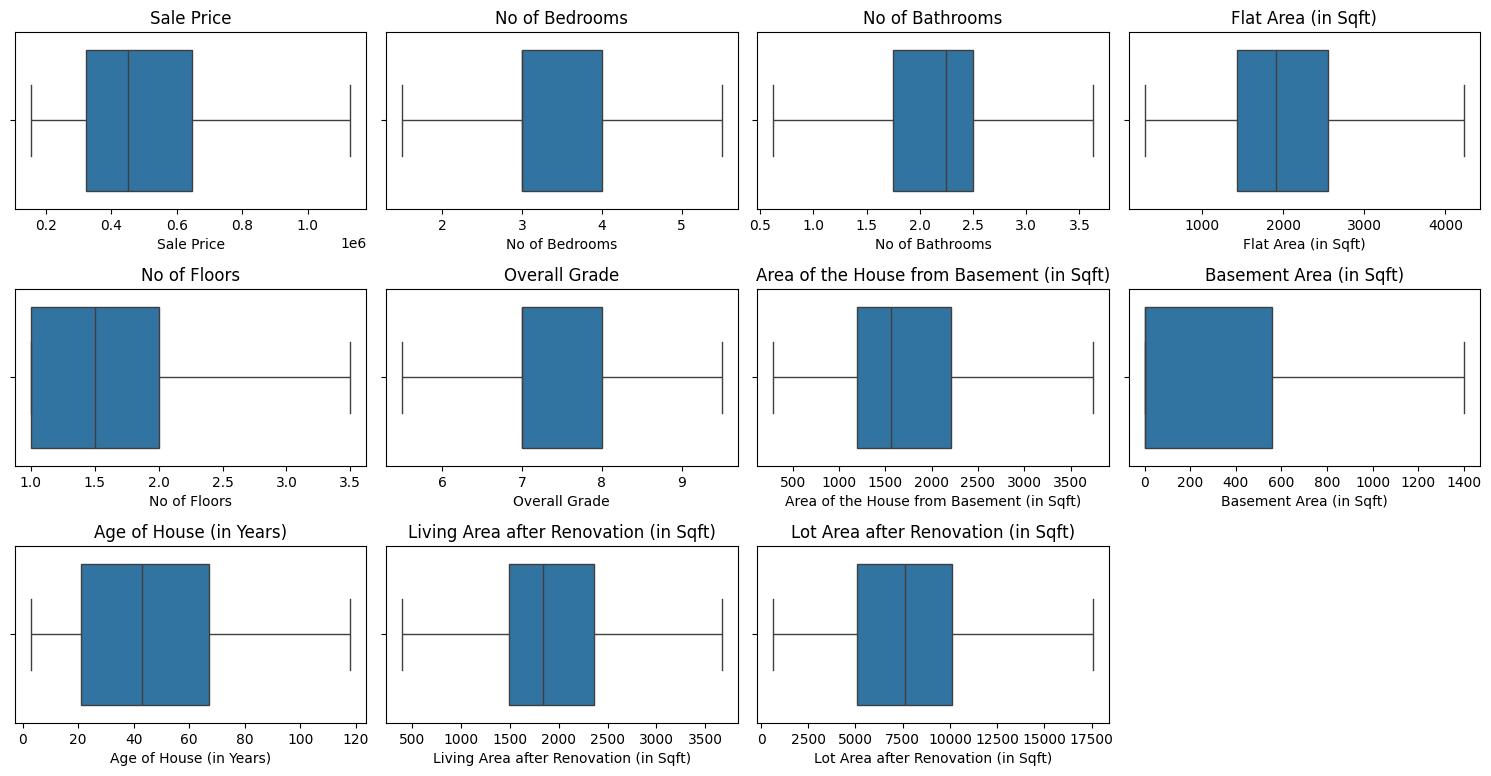

In [41]:
# Plot boxplots for all numerical columns to visualize outliers after handling outliers
exclude_cols = ['Latitude', 'Longitude']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=house_price[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [42]:
# encoding

house_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21607 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21607 non-null  float64
 1   No of Bedrooms                             21607 non-null  float64
 2   No of Bathrooms                            21607 non-null  float64
 3   Flat Area (in Sqft)                        21607 non-null  float64
 4   No of Floors                               21607 non-null  float64
 5   Waterfront View                            21607 non-null  object 
 6   Condition of the House                     21607 non-null  object 
 7   Overall Grade                              21607 non-null  float64
 8   Area of the House from Basement (in Sqft)  21607 non-null  float64
 9   Basement Area (in Sqft)                    21607 non-null  int64  
 10  Age of House (in Years)    

we need encode 2 columns namely warfront view and condition of the house

In [43]:
# mapping yes or no in column waterfront view to 0 or 1

mapping={
    "Yes":1,
    "No":0
}
house_price=pd.DataFrame(house_price)
house_price["Waterfront View"]=house_price["Waterfront View"].map(mapping)
house_price.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3.0,1.00,1180.0,1.0,0,Fair,7.0,1180.0,0,63,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,2.0,0,Fair,7.0,2170.0,400,67,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,1.0,0,Fair,6.0,770.0,0,85,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,1.0,0,Excellent,7.0,1050.0,910,53,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,1.0,0,Fair,8.0,1680.0,0,31,47.6168,-122.045,1800.0,7503.0


In [44]:
# encoding condition of the house
house_price["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [45]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
order=[["Bad","Fair","Okay","Good","Excellent"]]
ord_enc =OrdinalEncoder(categories=order)
house_price["Condition of the House"]= ord_enc.fit_transform(house_price[["Condition of the House"]])


In [46]:
# scaling
house_price.describe()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.118906e+05,3.362776,2.098458,2057.998843,1.494261,0.007544,1.768223,7.596265,1769.590688,284.034618,46.995464,47.560044,-122.213869,1975.148979,8299.432152
std,2.497355e+05,0.853974,0.721935,838.878815,0.539913,0.086529,1.085685,1.001567,763.908932,417.055496,29.370987,0.138560,0.140836,649.046147,4364.733390
min,1.535002e+05,1.500000,0.625000,290.000000,1.000000,0.000000,0.000000,5.500000,290.000000,0.000000,3.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,1.000000,7.000000,1190.000000,0.000000,21.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,1.000000,7.000000,1560.000000,0.000000,43.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,3.000000,8.000000,2210.000000,560.000000,67.000000,47.678000,-122.125000,2360.000000,10085.000000
max,1.129912e+06,5.500000,3.625000,4230.000000,3.500000,1.000000,4.000000,9.500000,3740.000000,1400.000000,118.000000,47.777600,-121.315000,3665.000000,17562.500000


we need to scale in such away that the columns like target variable sale price,encoded columns warfront view and condition of the house and other locational variable like latitude and longitude should not be scaled.

In [48]:
from sklearn.preprocessing import StandardScaler

# Exclude the target variable and already encoded columns from scaling
columns_to_scale = house_price.select_dtypes(include=np.number).columns.tolist()
columns_to_exclude = ['Sale Price', 'Waterfront View', 'Condition of the House', 'Latitude', 'Longitude']
columns_to_scale = [col for col in columns_to_scale if col not in columns_to_exclude]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected columns
house_price[columns_to_scale] = scaler.fit_transform(house_price[columns_to_scale])

# Display the first few rows of the scaled DataFrame
display(house_price.head())

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,-0.424819,-1.521581,-1.046658,-0.915466,0,1.0,-0.595346,-0.771825,-0.681063,0.544922,47.5112,-122.257,-0.978611,-0.607023
1,538000.0,-0.424819,0.209916,0.610354,0.936725,0,1.0,-0.595346,0.524171,0.278064,0.681114,47.7210,-122.319,-0.439346,-0.151314
2,180000.0,-1.595842,-1.521581,-1.535417,-0.915466,0,1.0,-1.593804,-1.308551,-0.681063,1.293978,47.7379,-122.233,1.147635,-0.054399
3,604000.0,0.746204,1.248815,-0.116824,-0.915466,0,4.0,-0.595346,-0.942007,1.500951,0.204442,47.5208,-122.393,-0.947796,-0.755947
4,510000.0,-0.424819,-0.136383,-0.450610,-0.915466,0,1.0,0.403113,-0.117282,-0.681063,-0.544613,47.6168,-122.045,-0.269862,-0.182474


In [50]:
# train and test split
from sklearn.model_selection import train_test_split
x=house_price.drop(columns=['Sale Price'])
y=house_price['Sale Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("shape of X_train:",x_train.shape)
print("shape of X_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (17285, 14)
shape of X_test: (4322, 14)
shape of y_train: (17285,)
shape of y_test: (4322,)
